<a href="https://colab.research.google.com/github/gitnicolas343/intro_neurociencias_Computacionesles_phyton/blob/main/Sadi_Nicolas_Mendoza_Soriano_Lab_Modelo_de_Hodgkin_Huxley_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Hodgkin y Huxley

# Simulación del Modelo de Hodgkin-Huxley

Este notebook tiene como objetivo simular el modelo clásico de Hodgkin-Huxley para una neurona y observar de manera numérica cómo se comporta una célula antes diferentes protocolos de simulación. El modelo de Hodgkin-Huxley describe la dinámica de la membrana neuronal utilizando ecuaciones diferenciales que capturan la evolución de variables de estado como el potencial de membrana y las conductancias de los canales iónicos.

### Modelo de Hodgkin-Huxley

Las ecuaciones que describen el modelo son las siguientes:

$
C_m \frac{dV}{dt} = I_{ext} - (I_{Na} + I_K + I_L)
$

donde:
- $ V $ es el potencial de membrana,
- $ C_m $ es la capacidad de la membrana,
- $ I_{ext} $ es la corriente externa aplicada,
- $ I_{Na} $, $ I_K $ y $ I_L $ son las corrientes de sodio, potasio y fuga, respectivamente.

### Corrientes iónicas

Las corrientes $ I_{Na} $, $ I_K $ y $ I_L $ se modelan de la siguiente manera:

$
I_{Na} = \bar{g}_{Na} m^3 h (V - E_{Na})
$
$
I_K = \bar{g}_K n^4 (V - E_K)
$
$
I_L = \bar{g}_L (V - E_L)
$

donde $ \bar{g} $ son las conductancias máximas, $ E $ son los potenciales de equilibrio y $ m $, $ h $, $ n $ son variables de compuerta.

### Variables de compuerta

Las variables $ m $, $ h $, y $ n $ siguen ecuaciones del tipo:

$
\frac{dx}{dt} = \alpha_x (1 - x) - \beta_x x
$

donde $ x $ puede ser $ m $, $ h $ o $ n $, y $ \alpha_x $ y $ \beta_x $ son funciones del potencial de membrana $ V $.

Para este ejercicio use las siguientes definiciones de $\alpha_x$ y $\beta_x$:

$$
\alpha_n = \frac{0.01(V+55)}{1-exp(-(V+55)/10)}
$$

$$
\beta_n = 0.125exp(-(V+65)/80)
$$


$$
\alpha_m = \frac{0.1(V+40)}{1-exp(-(V+40)/10)}
$$

$$
\beta_m = 4exp(-(V+65)/18)
$$

$$
\alpha_h = 0.07exp(-(V+65)/20)
$$

$$
\beta_h = \frac{1}{1+exp(-(V+35)/10)}
$$

así como $C_m = 1\mu/cm^2$, $\bar{g}_{Na} = 120ms/cm^2$, $\bar{g}_K = 36ms/cm^2$, $\bar{g}_L = 0.3 ms/cm^2$, $E_{Na} = 50mV$, $E_K = -77mV$, $E_L = -50mV$.


### Ejercicio 1:
Use un protocolo de estimulación que como el que se muestra en la figura a continuación y reconstruya el mismo gráfico. El protocolo de estimulación consiste en pulsos de 5 milisengundos de amplitud 5 el primero y 25 el segundo. Tenga en cuenta que este gráfico tiene parámetros ligeramente diferentes que hace que el potencial de membrana este movido a $V_{rest} = 0$.



In [ ]:
#librerias
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#parametros
C_m = 1 # uF/cm^2

#conductancias
g_Na = 120 # mS/cm^2
g_K = 36 # mS/cm^2
g_L = 0.3 # mS/cm^2

E_Na = 50 # mV
E_K = -77 # mV
E_L = -50 # mV



def I_ext(t):      #corriente aplicada en el tiempo, funcion a trozos con un condicional if que da una amplitus de 0,5 para el t = 2 y 2,5 de igual forma para 10 y 10,5
    if t < 2:
        return 0
    elif 2 < t < 2.5:
        return 5
    elif 10 < t < 10.5:
        return 25
    else:
        return 0


# definicion de  alpha y beta   de h,m,n como funciones para su evaluacion numerica
def alpha_n(V):
    return  0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):
    return 0.125*np.exp(-(V+65)/80)
def alpha_m(V):
    return  0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):
    return 4*np.exp(-(V+65)/18)
def alpha_h(V):
    return 0.07*np.exp(-(V+65)/20)
def beta_h(V):
    return 1/(1+np.exp(-(V+35)/10))


#funcion de las ecuaciones que hay que resolver
def ecuaciones_a_resolver(t,X,C_m,g_Na,g_K,g_L,E_Na,E_K,E_L):
    #variables y su posicion en tuplas
    V = X[0]
    m = X[1]
    n = X[2]
    h = X[3]
    I_E = I_ext(t) #pulso de corriente aplicado
    f =(1/C_m)*( I_E - ((g_Na*(m**3)*h*(V-E_Na))+(g_K*(n**4)*(V-E_K))+(g_L*(V-E_L))))  #c_m* dv/dt = Iext−(INa+IK+IL)
    O_n = alpha_n(V)*(1-n) - beta_n(V)*n  #dn/dt
    O_m = alpha_m(V)*(1-m) - beta_m(V)*m  #dm/dt
    O_h = alpha_h(V)*(1-h) - beta_h(V)*h  #dh/dt

    return [f,O_m,O_n,O_h]

#tiempo de simulacion
tspan= [0,20]
x0 = [0,0,0,0] #condiciones iniciales

parametros = (1,120,36,0.3,50,-77,-50)  #parametros

solucion = solve_ivp(ecuaciones_a_resolver, tspan, x0 , args= parametros,dense_output = True ) #ejecucion de la simulacion con scipy

tiempo_denso = np.linspace(tspan[0],tspan[-1],50000)  #tiempo denso


In [ ]:
#obtencion de parametros

tiempo = solucion.t
V,m,n,h  = solucion.y
V1,m1,n1,h1 =solucion.sol(tiempo_denso)

# ***CONSIDERACION DE VARIABLES ANTES DE GRAFICAR***

para las conductancias, teniendo en cuenta que  $\bar{g}_{x}$ es una  constante; con $\ x = [{Na,K,L}]$  que representa la conductancia maxima, sin embargo según lo visto en clase:


$$
I_x =\bar{g}_{x}(t)(v_m-E_x)
$$

comparando con las ecuaciones de $\ I_{Na} , I_{K} , I_{L} $  entonces vemos que la funcion de ${g}_{x}$ correspondiente a cada x es:
$$
\bar{g}_{Na}(t) = \bar{g}_{Na}(m(t)^3*h(t))
$$
$$
\bar{g}_{k}(t) = g_K¡n^4(t)
$$
$$
\bar{g}_{L}(t) = \bar{g}_{L}
$$

In [ ]:
#conductancias
g_na_t = g_Na*m1**3*h1
g_k_t = g_K*n1**4


In [ ]:
#corrientes
I_na = g_na_t*(V1-E_Na)
I_K = g_k_t*(V1-E_K)
I_L = g_L*(V1-E_Na)
a_0 = I_na + I_K+ I_L

In [ ]:
#corriente aplicada

a = [] #lista vaciapara almacenar la evaluacion de la funcion de I_ext

for i in tiempo_denso:   #ciclo for que itera sobre el vector de tiempo denso  y en la variable x se almacena la evalcion que posteriormente  se guarda en la lista a
    x =a.append(I_ext(i))


pulso = np.array(a)  #transformamos a en un vector de numpy

# **GRAFICA COMPLETA**

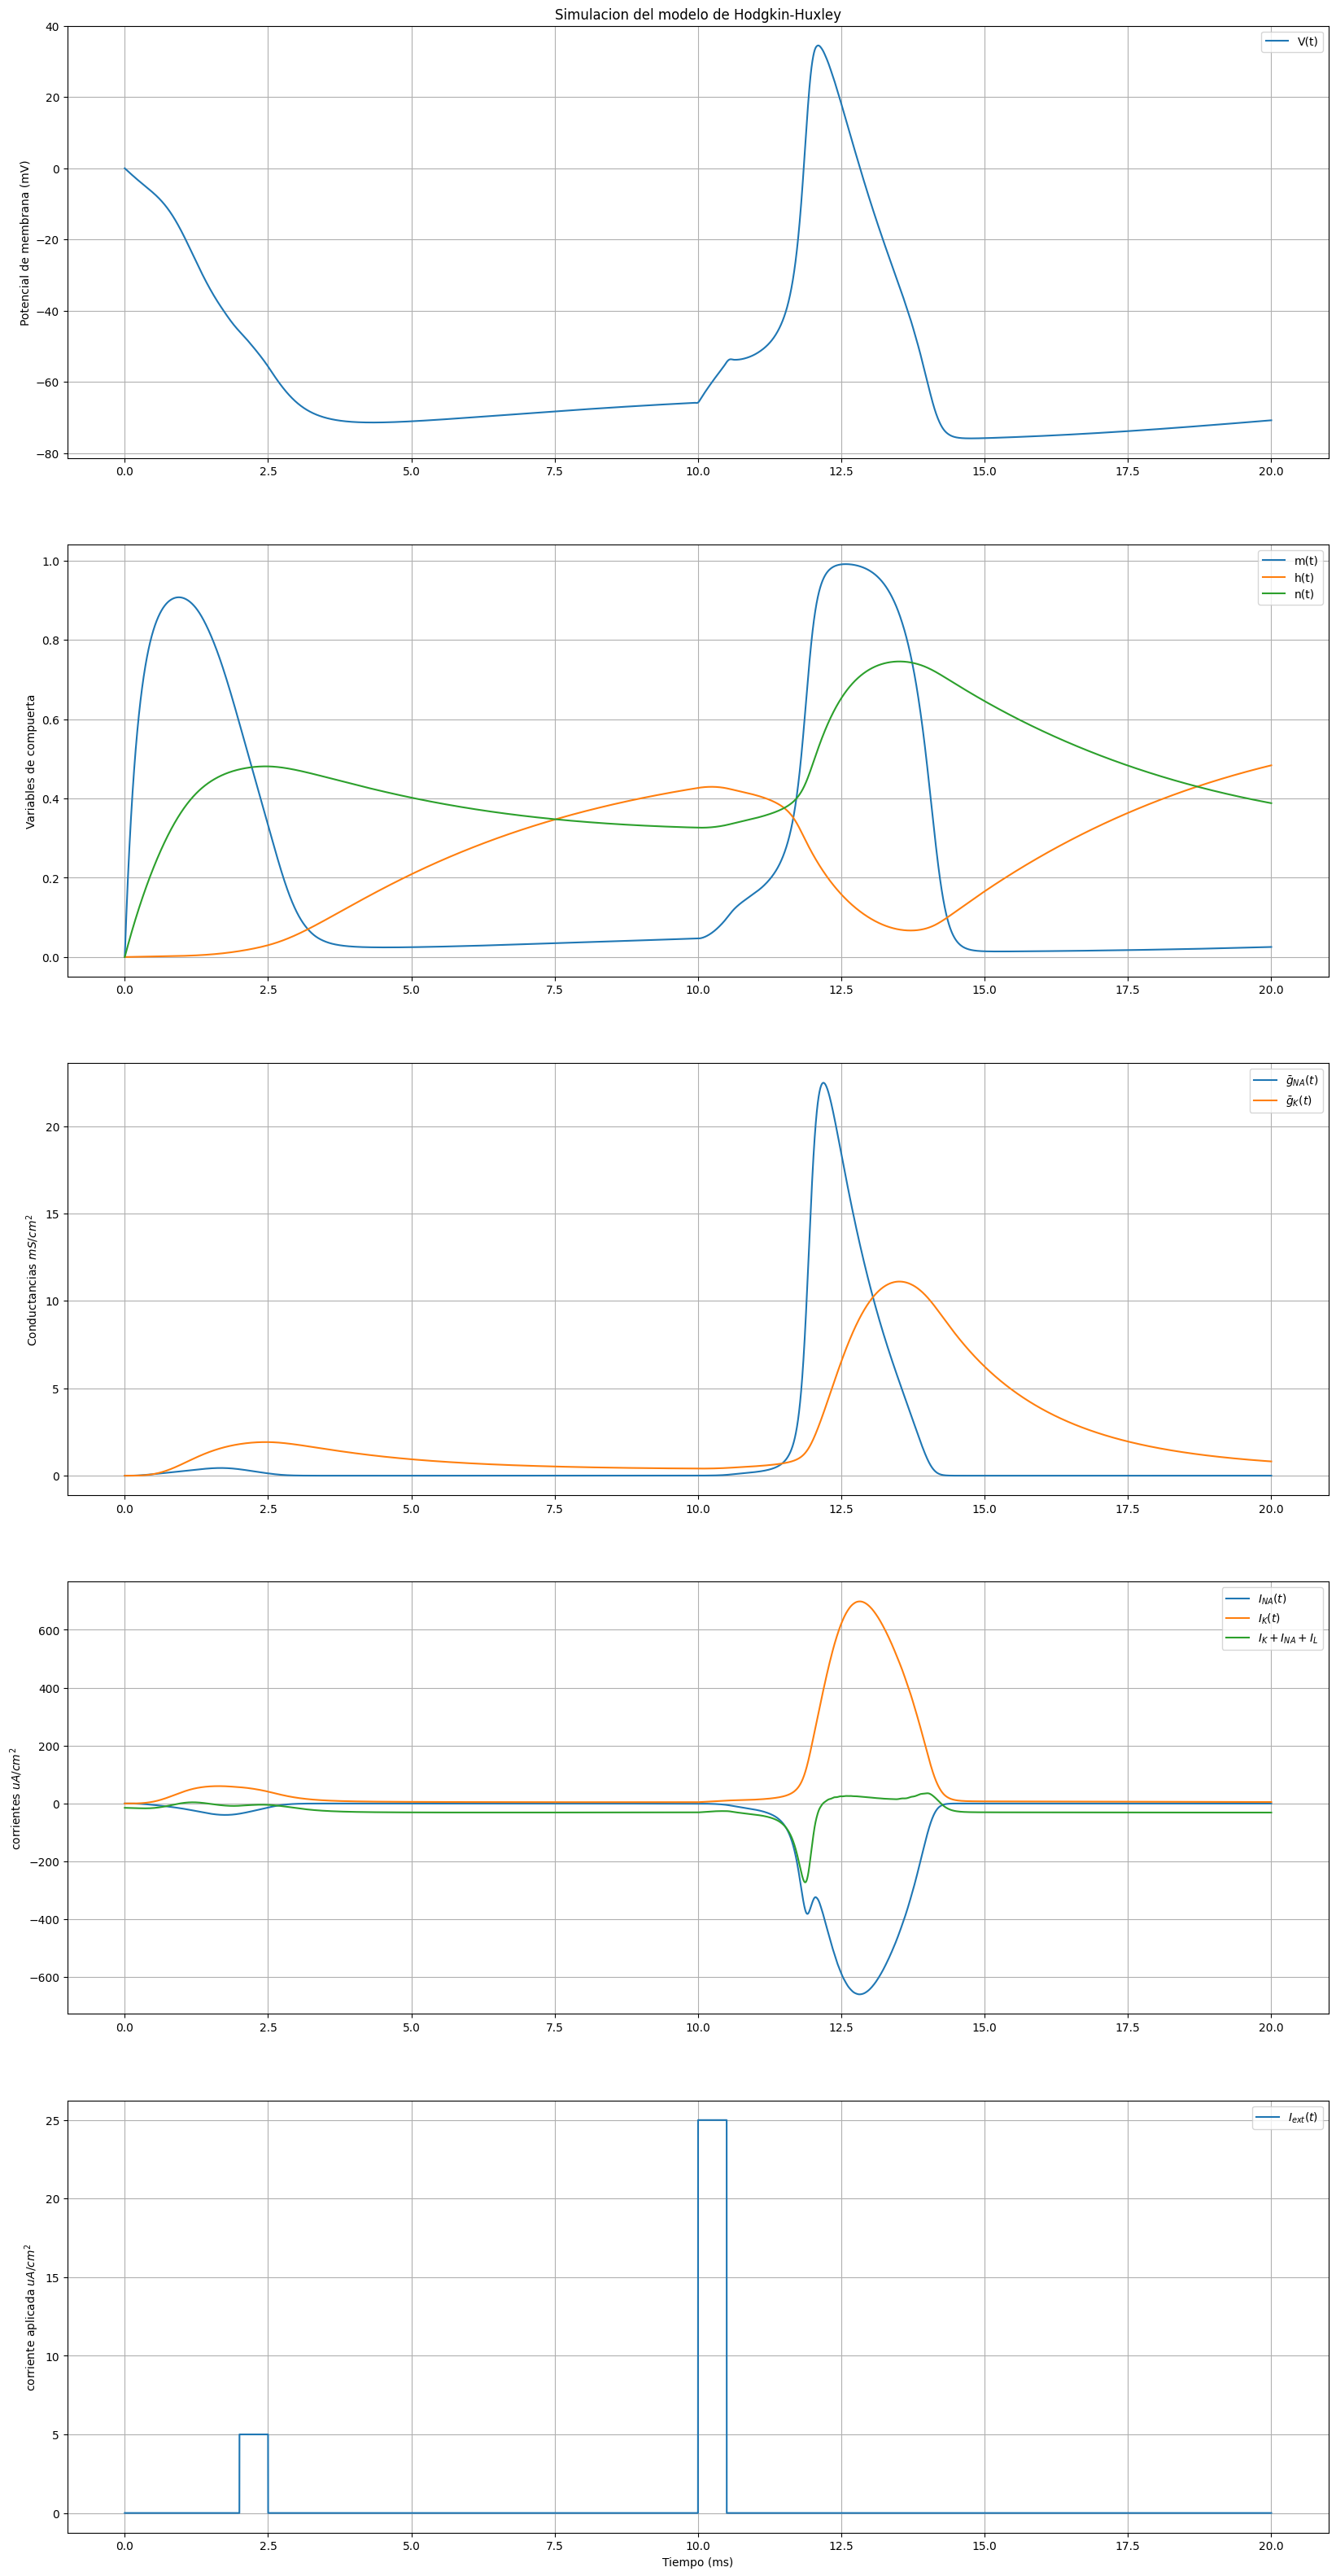

In [ ]:
#grafica completa, parametros de graficacion
plt.figure(figsize=(20,40))
plt.subplot(5,1,1)
plt.title('Simulacion del modelo de Hodgkin-Huxley')
#grafica potencial de menbrana vs tiempo_denso
plt.plot(tiempo_denso,V1, label = 'V(t)')
plt.ylabel('Potencial de membrana (mV)')
plt.legend()
plt.grid()

plt.subplot(5,1,2)

# grafica de los valores  de m,n,h (se obtienen de la tupla de salida de solve_ivp y se grafican contra tiempo denso)
plt.plot(tiempo_denso, m1, label='m(t)')
plt.plot(tiempo_denso, h1, label='h(t)')
plt.plot(tiempo_denso, n1, label='n(t)')
plt.ylabel('Variables de compuerta')
plt.grid()
plt.legend()



plt.subplot(5,1,3)


#grafica conductancias
plt.plot(tiempo_denso,g_na_t, label = r'$\bar{g}_{NA}(t)$')
plt.plot(tiempo_denso,g_k_t, label = r'$\bar{g}_{K}(t)$')
plt.ylabel('Conductancias $mS/cm^2$')
plt.grid()
plt.legend()



plt.subplot(5,1,4)

#grafica de corrientes
plt.plot(tiempo_denso,I_na, label = '${I}_{NA}(t)$')
plt.plot(tiempo_denso, I_K , label = '${I}_{K}(t)$')
plt.plot(tiempo_denso, a_0, label = '${I}_{K} + {I}_{NA} + I_L $')
plt.ylabel('corrientes $uA/cm^2$')
plt.grid()
plt.legend()

plt.subplot(5,1,5)

#grafica corriente aplicada
plt.plot(tiempo_denso,pulso, label = '${I}_{ext}(t)$')
plt.ylabel('corriente aplicada $uA/cm^2$')
plt.grid()
plt.legend()
plt.xlabel('Tiempo (ms)')

plt.show()


#Ejercicio 2:



Repita el ejercicio anterior pero ahora aplique otro pulso de amplitud 25$\mu A/cm^2$ a los 15ms y responda las siguientes preguntas:

1. Qué esperaría observar?
2. Qué observa en cambio esta vez?
3. Investigue por qué se da el periodo refractario

#Respuesta preguntas:

1.Podría esperarse que cada pulso de 25 uA/Cm^2 genere un potencial de acción como se vio en la simulación anterior genero una curva de potencial que ascendió hasta casi 40 mV, según la teoría de clase, se debería generar un potencial de acción nuevo si se supera cierto valor o umbral de corriente en el nuevo pulso, esto tiene algunas implicaciones , como  si este nuevo pulso no cae en el periodo refractario absoluto, o si cae en el periodo refractario relativo entonces  observaríamos un potencial de acción de menor o mayor amplitud dependiendo del caso y la intensidad del estimulo o en su defecto no observaríamos potencial de acción dependiendo del periodo en que se encuentre.

2.Se observa que hay un segundo potencial de acción poco significativo, en lo que aparece  ser una pequeña montaña de potencial de acción que no luce significativa, indicando que el pulso parece haber caido en un periodo refractario relativo lo cual seria  coherente pues han pasado aproximadamente 3 ms, tiempo en que los canales de algunos de los iones puede que se hayan recuperado, pero debido a su baja amplitud la cual no es comparable con el potencial que le precede, parece fuertemente indicar que es mas un periodo refractario absoluto adicionando que se haya en el negativo de Vm.

3.El potencial de acción se da teniendo en cuenta que, después de la fase de repolarización, en las que variables h tienden a 0 y causando la inactivación de Na+, además n tiende a 1 haciendo que la corriente k+ se active, lo que provoca la repolarizando del potencial de membrana.

Se puede observar ademas, que las constantes de tiempo $\tau{(V)}$ y $\tau{(V)}$  son grandes, por lo que n y h tardan en recuperarse, teniendo en cuenta que K+ continúa activada, dando lugar a la fase descendente en el fenómeno de hiperpolarización. en esta fase la corriente de Na+ este inactiva con h pequeña por lo que no está disponible para una función regenerativa y no por lo tanto no se puede generar un potencial de acción en un tiempo conocido como periodo refractario absoluto. Mientras esta corriente se reactiva, el sistema es capaz de generar un potencial de acción siempre y cuando la corriente sea los suficientemente fuerte en el proceso conocido como periodo refractario relativo el cual genera un potencial de acción de menor amplitud.

En contraste vemos que la recuperación de los canales iónicos después del potencial de acción son los responsables del periodo refractario particularmente cuando h es muy pequeña y esto se puede ver en la gráfica de  variables de compuerta donde h es  muy hace pequeña  y se recupera lentamente, además en el modelo de Hodgkin y Huxley la recuperación de los canales de k+ es de alrededor 4ms mientras que la recuperación completa de los canales de Na+ es de alrededor de 20 ms. este comportamiento determina tanto la duración de los períodos refractarios como la capacidad de la neurona para responder a estímulos repetidos en intervalos cortos.  


# REIMPLEMENTACION DEL MODELO DE HODGKIN - HUXLEY CON UN TERCER PICO DE 25uA/Cm^2 en t = 15ms

In [ ]:
# TODO
# se cambio el nombre de las variables
#parametros

def I_ext2(t):      #corriente aplicada en el tiempo, funcion a trozos con un condicional if que da una amplitus de 0,5 para el t = 2 y 2,5 de igual forma para 10 y 10,5
    if t < 2:
        return 0
    elif 2 < t < 2.5:
        return 5
    elif 10 < t < 10.5:
        return 25
    elif 15 < t < 15.5:   #nuevo pulso a los 15 ms de duracion 0.5 ms y amplitus 25uA/cm^2
        return 25
    else:
        return 0

#reusamos los codigo anteriores pero cambiando I_ext  a I_ext2
def ecuaciones_a_resolver2(t,X,C_m,g_Na,g_K,g_L,E_Na,E_K,E_L):
    #variables y su posicion en tuplas
    V11 = X[0]
    m11 = X[1]
    n11 = X[2]
    h11 = X[3]
    I_E = I_ext2(t) #pulso de corriente aplicado
    f =(1/C_m)*( I_E - ((g_Na*(m11**3)*h11*(V11-E_Na))+(g_K*(n11**4)*(V11-E_K))+(g_L*(V11-E_L))))  #c_m* dv/dt = Iext−(INa+IK+IL)
    O_n = alpha_n(V11)*(1-n11) - beta_n(V11)*n11  #dn/dt
    O_m = alpha_m(V11)*(1-m11) - beta_m(V11)*m11  #dm/dt
    O_h = alpha_h(V11)*(1-h11) - beta_h(V11)*h11  #dh/dt

    return [f,O_m,O_n,O_h]

solucion2 = solve_ivp(ecuaciones_a_resolver2, tspan, x0 , args= parametros,dense_output = True ) #ejecucion de la simulacion con scipy

#obtencion de  segundo parametros

tiempo = solucion2.t
V11,m11,n11,h11  = solucion2.y
V2,m2,n2,h2 =solucion2.sol(tiempo_denso)

#conductancias
g_na_t2 = g_Na*m2**3*h2
g_k_t2 = g_K*n2**4

#corrientes
I_na2 = g_na_t2*(V2-E_Na)
I_K2 = g_k_t2*(V2-E_K)
I_L2= g_L*(V2-E_Na)
a_02= I_na2 + I_K2+ I_L2

#corriente aplicada

a2 = [] #lista vaciapara almacenar la evaluacion de la funcion de I_ext2

for i in tiempo_denso:   #ciclo for que itera sobre el vector de tiempo denso  y en la variable x se almacena la evalcion que posteriormente  se guarda en la lista a
    x =a2.append(I_ext2(i))

pulso2 = np.array(a2)  #transformamos a en un vector de numpy

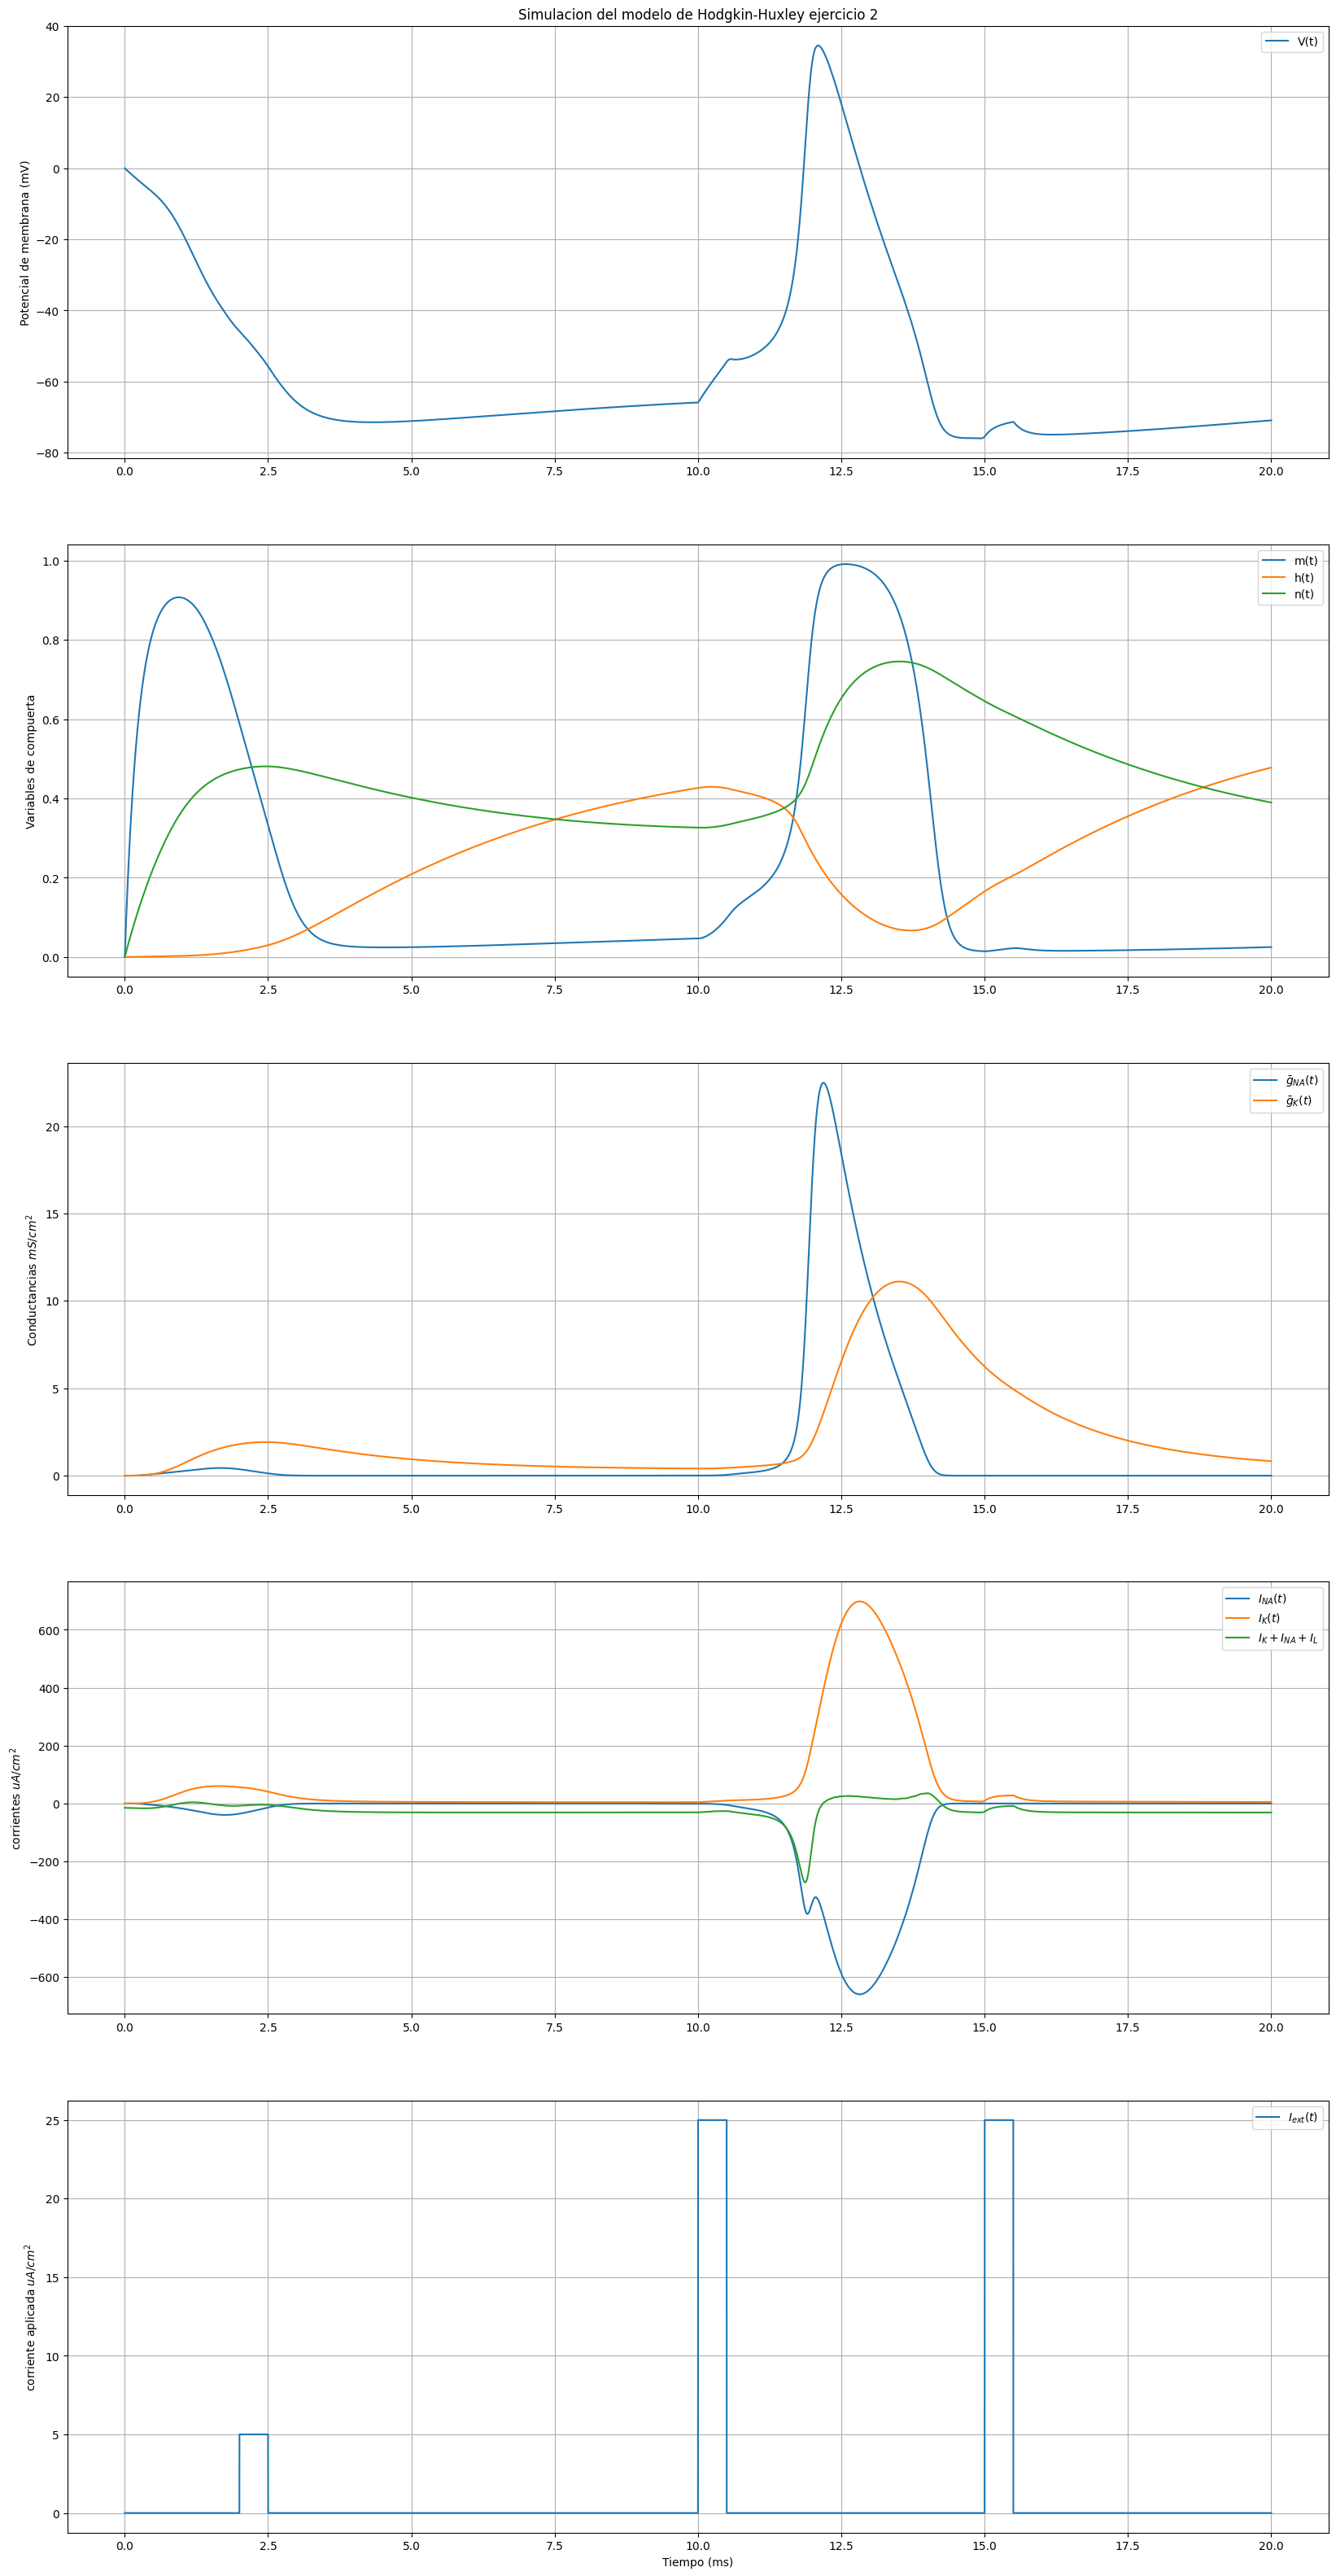

In [ ]:
#grafica completa, parametros de graficacion
plt.figure(figsize=(20,40))
plt.subplot(5,1,1)
plt.title('Simulacion del modelo de Hodgkin-Huxley ejercicio 2')
#grafica potencial de menbrana vs tiempo_denso
plt.plot(tiempo_denso,V2, label = 'V(t)')
plt.ylabel('Potencial de membrana (mV)')
plt.legend()
plt.grid()
plt.subplot(5,1,2)
# grafica de los valores  de m,n,h (se obtienen de la tupla de salida de solve_ivp y se grafican contra tiempo denso)
plt.plot(tiempo_denso, m2, label='m(t)')
plt.plot(tiempo_denso, h2, label='h(t)')
plt.plot(tiempo_denso, n2, label='n(t)')
plt.ylabel('Variables de compuerta')
plt.grid()
plt.legend()
plt.subplot(5,1,3)
#grafica conductancias
plt.plot(tiempo_denso,g_na_t2, label = r'$\bar{g}_{NA}(t)$')
plt.plot(tiempo_denso,g_k_t2, label = r'$\bar{g}_{K}(t)$')
plt.ylabel('Conductancias $mS/cm^2$')
plt.grid()
plt.legend()
plt.subplot(5,1,4)
#grafica de corrientes
plt.plot(tiempo_denso,I_na2, label = '${I}_{NA}(t)$')
plt.plot(tiempo_denso, I_K2 , label = '${I}_{K}(t)$')
plt.plot(tiempo_denso, a_02, label = '${I}_{K} + {I}_{NA} + I_L $')
plt.ylabel('corrientes $uA/cm^2$')
plt.grid()
plt.legend()
plt.subplot(5,1,5)
#grafica corriente aplicada
plt.plot(tiempo_denso,pulso2, label = '${I}_{ext}(t)$')
plt.ylabel('corriente aplicada $uA/cm^2$')
plt.grid()
plt.legend()
plt.xlabel('Tiempo (ms)')
plt.show()

REFERENCIAS:

1. Gerstner, W., Kistler, W. M., Naud, R., & Paninski, L. (2014). Neuronal dynamics: From single
neurons to networks and models of cognition. Cambridge University Press.
2. Dayan, P., & Abbott, L. F. (2005). Theoretical neuroscience: computational and mathematical
modeling of neural systems. MIT press.
3. Izhikevich, E. M. (2007). Dynamical systems in neuroscience. MIT press.